# Intensity point source mapping

In [10]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
!ls -ltr

total 333880
-rw-r--r--  1 pai  staff     67513 20 Oct 12:25 libsearch
-rw-r--r--@ 1 pai  staff       858 20 Oct 12:25 quat_rotation.py
-rw-r--r--@ 1 pai  staff     17422 20 Oct 12:25 readligo.py
-rw-r--r--@ 1 pai  staff     25682 20 Oct 12:26 LISAMAPS_class.py
-rw-r--r--@ 1 pai  staff       863 20 Oct 16:01 config.py
-rw-r--r--@ 1 pai  staff      4737 20 Oct 16:33 OverlapFunctsSrc.py
-rw-r--r--  1 pai  staff     98810 26 Oct 16:50 hp_hc_in_ns16.npz
drwxr-xr-x  5 pai  staff       160 26 Oct 17:03 const_ph_tests
drwxr-xr-x  5 pai  staff       160 26 Oct 17:11 rd_ph_tests
drwxr-xr-x  7 pai  staff       224 26 Oct 18:19 in_equals_out_tests
-rw-r--r--  1 pai  staff   4731872 26 Oct 19:10 map_PC_16_in_ns_4.npz
-rw-r--r--  1 pai  staff    298976 26 Oct 19:59 map_PC_16_in_ns_2.npz
-rw-r--r--  1 pai  staff     16616 27 Oct 17:33 PCMAPS_class.py
drwxr-xr-x  6 pai  staff       192 29 Oct 07:39 hiell_tests
-rw-r--r--  1 pai  staff    197076  3 Nov 14:51 Galinmap_ns32.npz
-rw-r--r--  1 pai  staff 

# nside_in = 4, nside_out = 4

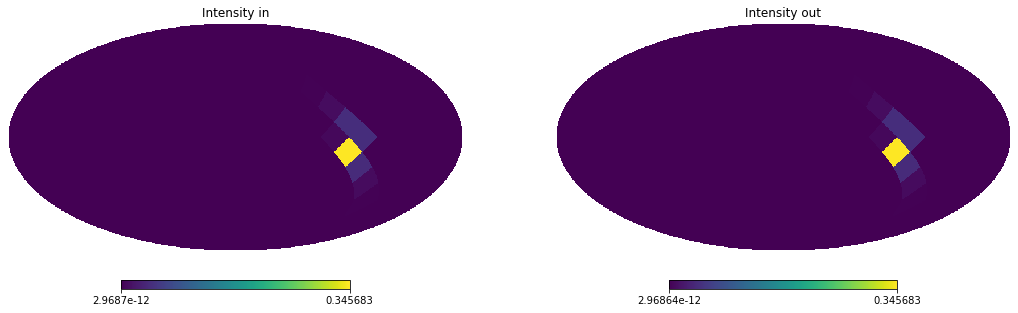

In [14]:
filein = np.load('hp_hc_in_ns16_GB_np.npz') 
file   = np.load('Imap_GB_HL_ns_4.npz')

hp_in = filein['hp_in']
hc_in = filein['hc_in']

map_out = file['map']
map_in  = hp_in*np.conj(hp_in) +hc_in*np.conj(hc_in)

fig, (ax1, ax2) = plt.subplots(figsize = (18,10), ncols=2)

plt.axes(ax1)
hp.mollview(hp.ud_grade(map_in, nside_out = 4), hold = True, title = 'Intensity in')
plt.axes(ax2)
hp.mollview(map_out, hold = True, title = 'Intensity out')


# nside_in = 16, nside_out = 8

(0.0026712460420498345+0j) (0.002649269002038648+0j)


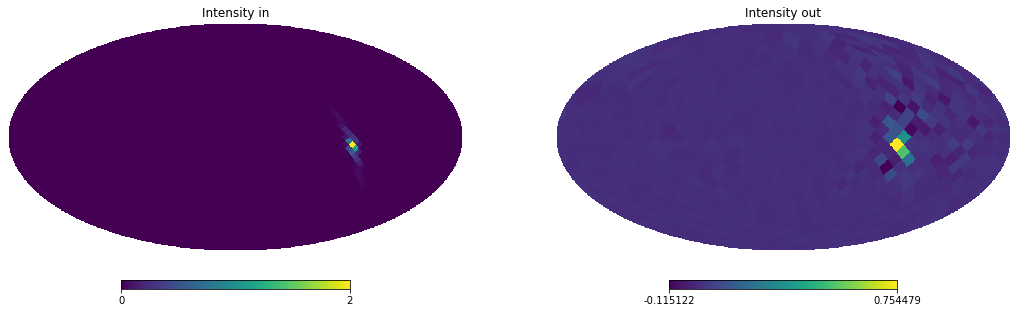

In [23]:
file    = np.load('Imap_GB_HL_ns_8.npz')
map_out = file['map']

fig, (ax1, ax2) = plt.subplots(figsize = (18,10), ncols=2)

plt.axes(ax1)
hp.mollview(map_in, hold = True, title = 'Intensity in')
plt.axes(ax2)
hp.mollview(map_out, hold = True, title = 'Intensity out')

print(np.mean(map_in), np.mean(map_out))

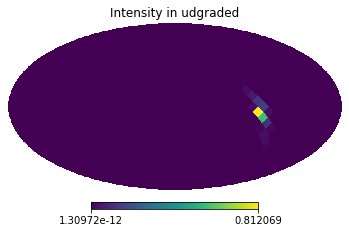

In [22]:
hp.mollview(hp.ud_grade(map_in, nside_out = 8), hold = True, title = 'Intensity in udgraded')

### hence the monopole is conserved, but some of the power is aliased into the surrounding pixels as the signal scale is < pixel scale

# Phase coherent point source mapping

In [34]:
!ls -ltr | tail -10  

-rw-r--r--  1 pai  staff   4731872 11 Nov 10:28 map_GB_np_smoothHL_ns_4.npz
-rw-r--r--  1 pai  staff    393722 11 Nov 10:51 hp_hc_in_ns16_GB_np_smooth.npz
-rw-r--r--  1 pai  staff    197114 11 Nov 10:51 hp_hc_in_ns16_GB_pc_smooth.npz
-rw-r--r--  1 pai  staff      3329 11 Nov 10:52 PC_runner.py
-rw-r--r--  1 pai  staff     98810 11 Nov 11:00 hp_hc_in_ns16_GB_smooth.npz
-rw-r--r--@ 1 pai  staff     16891 11 Nov 11:00 PCMAPS_class.py
drwxr-xr-x  7 pai  staff       224 11 Nov 11:00 __pycache__
-rw-r--r--  1 pai  staff    117083 11 Nov 11:01 Untitled.ipynb
-rw-r--r--  1 pai  staff   4731872 11 Nov 11:51 map_GB_smoothHL_ns_4.npz
-rw-r--r--  1 pai  staff    330820 11 Nov 17:08 unpack_point_source.ipynb


0.0005815663075992888 (0.0004508286611369821+0j)


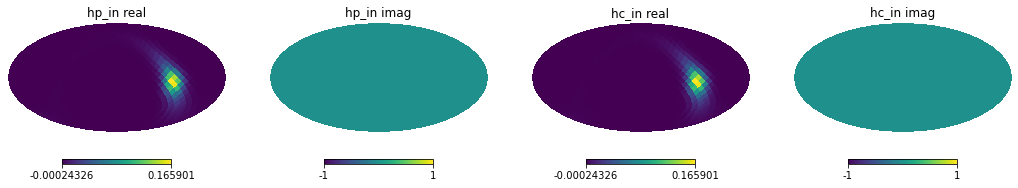

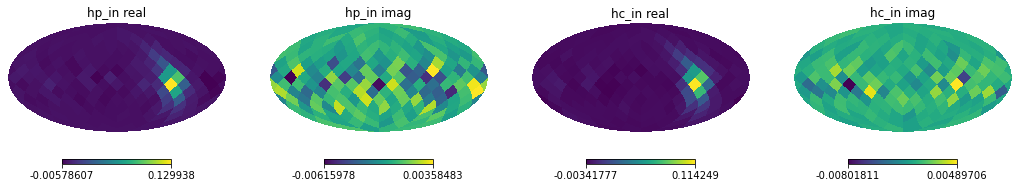

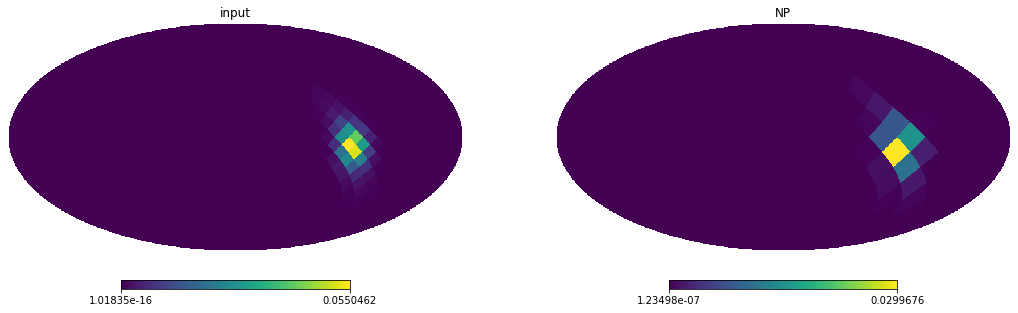

In [40]:
fileGBi1 = np.load('hp_hc_in_ns16_GB_np_smooth.npz')
fileGBo1 = np.load('map_GB_np_smoothHL_ns_4.npz')

hp_i1 = hp.ud_grade(fileGBi1['hp_in'], nside_out = 8)
hc_i1 = hp.ud_grade(fileGBi1['hc_in'], nside_out = 8)

hp_o1 = fileGBo1['h_plus']
hc_o1 = fileGBo1['h_cross']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_i1.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_i1.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_i1.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_i1.imag, hold = True, title ="hc_in imag")


fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_o1.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_o1.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_o1.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_o1.imag, hold = True, title ="hc_in imag")


##

fig, (ax1, ax2) = plt.subplots(figsize = (18,10), ncols=2)

plt.axes(ax1)
hp.mollview(hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1), hold = True, title = 'input')
plt.axes(ax2)
hp.mollview(hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1), hold = True, title = 'NP')

print(np.mean(hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1)), np.mean(hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1)))

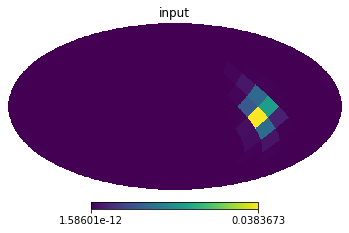

In [41]:
hp.mollview(hp.ud_grade(hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1), nside_out = 4), hold = True, title = 'input')

/Users/pai/miniconda3/lib/python3.8/site-packages/healpy/projector.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


(0.0003858257962897544+0j) (0.00024040600509206642+0j)


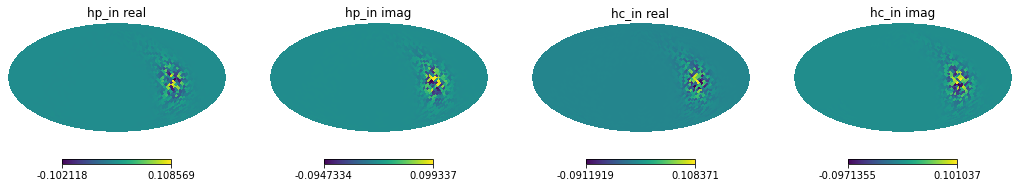

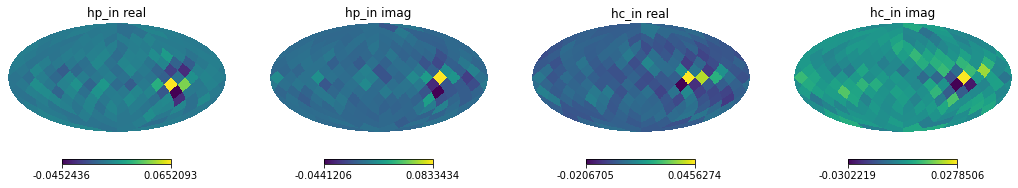

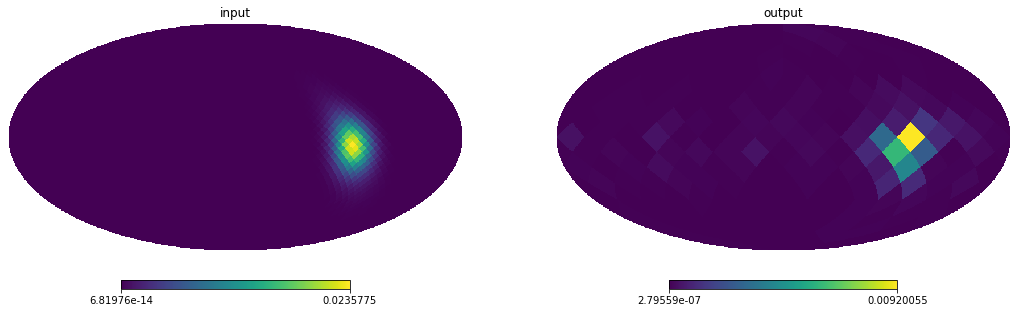

In [42]:
fileGBi1 = np.load('hp_hc_in_ns16_GB_smooth.npz')
fileGBo1 = np.load('map_GB_smoothHL_ns_4.npz')

hp_i1 = fileGBi1['hp_in']
hc_i1 = fileGBi1['hc_in']

hp_o1 = fileGBo1['h_plus']
hc_o1 = fileGBo1['h_cross']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_i1.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_i1.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_i1.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_i1.imag, hold = True, title ="hc_in imag")


fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_o1.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_o1.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_o1.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_o1.imag, hold = True, title ="hc_in imag")


##

fig, (ax1, ax2) = plt.subplots(figsize = (18,10), ncols=2)

plt.axes(ax1)
hp.mollview(hp_i1*np.conj(hp_i1) + hc_i1*np.conj(hc_i1), hold = True, title = 'input')
plt.axes(ax2)
hp.mollview(hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1), hold = True, title = 'output')

print(np.mean(hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1)), np.mean(hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1)))

(0.0026712460420498345+0j) (0.0012020176718586617+0j) (0.0010174253372055408+0j)


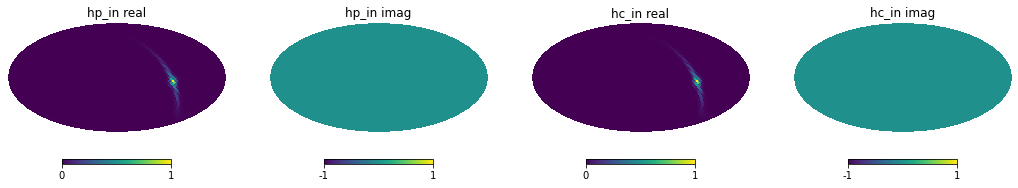

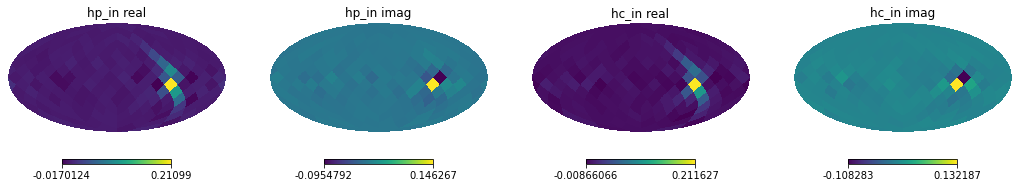

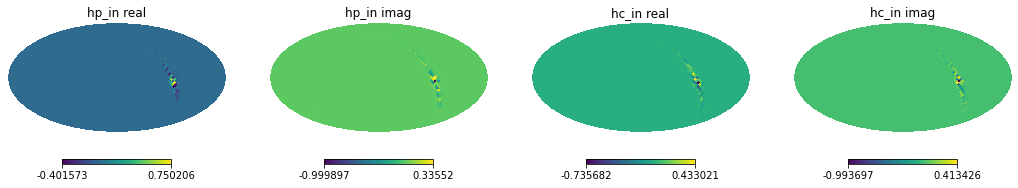

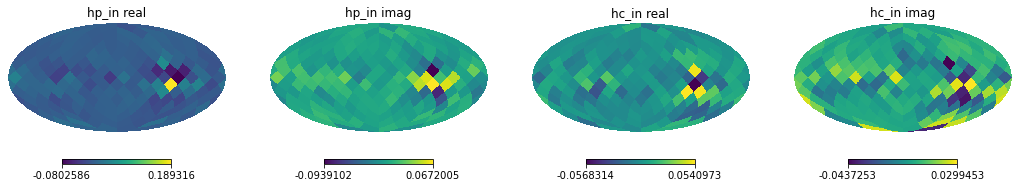

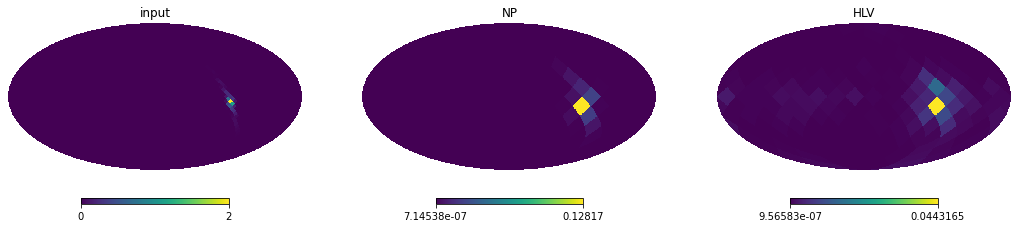

In [47]:
fileGBi1 = np.load('hp_hc_in_ns16_GB_np.npz')
fileGBi2 = np.load('hp_hc_in_ns16_GB.npz')
fileGBo1 = np.load('map_GB_npHLV_ns_4.npz') 
fileGBo2 = np.load('map_GBHLV_ns_4.npz')

hp_i1 = fileGBi1['hp_in']
hc_i1 = fileGBi1['hc_in']

hp_i2 = fileGBi2['hp_in']
hc_i2 = fileGBi2['hc_in']

hp_o1 = fileGBo1['h_plus']
hc_o1 = fileGBo1['h_cross']

hp_o2 = fileGBo2['h_plus']
hc_o2 = fileGBo2['h_cross']


fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_i1.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_i1.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_i1.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_i1.imag, hold = True, title ="hc_in imag")


fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_o1.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_o1.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_o1.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_o1.imag, hold = True, title ="hc_in imag")


##


fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_i2.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_i2.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_i2.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_i2.imag, hold = True, title ="hc_in imag")


fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (18,10), ncols=4)

plt.axes(ax1)
hp.mollview(hp_o2.real, hold = True, title ="hp_in real")
plt.axes(ax2)
hp.mollview(hp_o2.imag, hold = True, title ="hp_in imag")
plt.axes(ax3)
hp.mollview(hc_o2.real, hold = True, title ="hc_in real")
plt.axes(ax4)
hp.mollview(hc_o2.imag, hold = True, title ="hc_in imag")



fig, (ax1, ax2, ax3) = plt.subplots(figsize = (18,10), ncols=3)

plt.axes(ax1)
hp.mollview(hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1), hold = True, title = 'input')
plt.axes(ax2)
hp.mollview(hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1), hold = True, title = 'NP')
plt.axes(ax3)
hp.mollview(hp_o2*np.conj(hp_o2) +hc_o2*np.conj(hc_o2), hold = True, title = 'HLV')


mapin1 = hp_i1*np.conj(hp_i1) +hc_i1*np.conj(hc_i1)
mapou1 = hp_o1*np.conj(hp_o1) +hc_o1*np.conj(hc_o1)
mapou2 = hp_o2*np.conj(hp_o2) +hc_o2*np.conj(hc_o2)

print(np.mean(mapin1), np.mean(mapou1), np.mean(mapou2))